# Linear Operators

Finite dimensional linear operators allow matrix algebra without explicitly constructing a full matrix representation. Instead it suffices to define a matrix-vector product and a shape attribute. This avoids unnecessary memory usage and can often be more convenient to derive.

In [1]:
# Make inline plots vector graphics instead of raster graphics
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

# Plotting
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [9.5, 6]
plt.style.use("probnum.mplstyle")


## Sparsity and Operator Arithmetic

We begin by sampling a random sparse matrix, represent it as a `LinearOperator` and perform some simple arithmetic.

In [2]:
import numpy as np
import scipy.sparse
from probnum.linalg.linops import MatrixMult, Identity

# Linear operator from sparse matrix
n = 50
mat = scipy.sparse.rand(m=n, n=n, density=0.05, random_state=42)
A = MatrixMult(A=mat)

# Linear operator arithmetic
Id = Identity(shape=n)
B = A ** 4 + 1.5 * Id

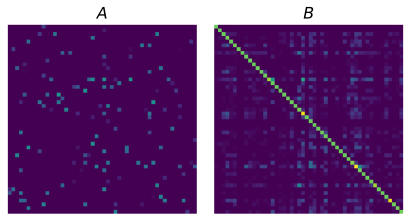

In [3]:
# Plot
matdict = {"$A$": A.todense(), "$B$": B.todense()}
vmin = np.min([np.min(mat) for mat in list(matdict.values())])
vmax = np.max([np.max(mat) for mat in list(matdict.values())])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3.5))
for i, (title, mat) in enumerate(matdict.items()): 
    axes[i].imshow(mat, vmin=vmin, vmax=vmax)
    axes[i].set_axis_off()
    axes[i].title.set_text(title)
fig.tight_layout()

## The Kronecker Product

A frequently occuring linear operator is the *Kronecker product* of two matrices. Example application areas are matrix-variate distributions, signal processing, image processing, semi-definite programming and deep learning. We will illustrate some basic properties here.

In [4]:
from probnum.linalg.linops import Kronecker, SymmetricKronecker

# Kronecker Product
A = np.array([[4, 1, 4], 
              [2, 3, 2]])
B = np.array([[1], [4]])
W = Kronecker(A, B)
V = Kronecker(B, A)

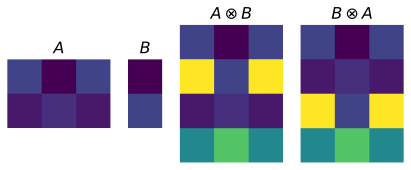

In [5]:
# Plot
matdict = {"$A$": A, "$B$": B, "$A \otimes B$": W.todense(), "$B \otimes A$": V.todense()}
vmin = np.min([np.min(mat) for mat in list(matdict.values())])
vmax = np.max([np.max(mat) for mat in list(matdict.values())])

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(6, 3.5), gridspec_kw={'width_ratios': [3, 1, 3, 3]})
for i, (title, mat) in enumerate(matdict.items()): 
    axes[i].imshow(mat, vmin=vmin, vmax=vmax)
    axes[i].set_axis_off()
    axes[i].title.set_text(title)
fig.tight_layout()

The elements of the Kronecker product $A \otimes B$ consist of all possible products of an entry of $B \in \mathbb{R}^{m_2 \times n_2}$ with an entry of $A \in \mathbb{R}^{m_1 \times n_1}$. If this was represented as a full matrix instead of a linear operator, one would have to store and multiply with a matrix of dimensions $m_1m_2 \times n_1n_2$. However, by just defining the matrix-vector product instead, it suffices to store the matrices $A$ and $B$.

A useful relative of the Kronecker product is the *symmetric Kronecker product*. As we will see later it can be used to define a distribution over symmetric matrices.

In [6]:
# Symmetric Kronecker Product
C = np.array([[5, 1], 
              [2, 10]])
D = np.array([[1, 2], 
              [3, 4]])
Ws = SymmetricKronecker(C, D)
Vs = SymmetricKronecker(D, C)

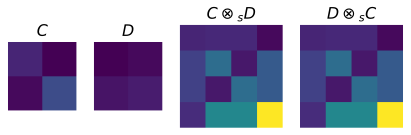

In [7]:
# Plot
matdict = {"$C$": C, "$D$": D, "$C \otimes_s D$": Ws.todense(), "$D \otimes_s C$": Vs.todense()}
vmin = np.min([np.min(mat) for mat in list(matdict.values())])
vmax = np.max([np.max(mat) for mat in list(matdict.values())])

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(6, 3.5), gridspec_kw={'width_ratios': [2, 2, 3, 3]})
for i, (title, mat) in enumerate(matdict.items()): 
    axes[i].imshow(mat, vmin=vmin, vmax=vmax)
    axes[i].set_axis_off()
    axes[i].title.set_text(title)
fig.tight_layout()

Note, that the symmetric Kronecker product generally does *not* have a *symmetric* matrix representation. If its arguments are symmetric, then so is their product. We also observe another property of the symmetric Kronecker product, namely that $C \otimes_s D = D \otimes_s C$. This is not the case for the Kronecker product as we saw above.

## Linear Operators and Random Variables

When defining distributions over $m \times n$ matrices, the covariance has dimension $(mn)^2$, which quickly becomes prohibitively large. This can be somewhat remedied by using linear operators as parameters, since for most computations with matrix-variate random variables the full covariance matrix never needs to be formed explicitly. An example is the matrix-variate normal distribution, where one often assumes Kronecker-structured covariances. One can use the symmetric Kronecker product in this context to define a distribution over symmetric matrices.

In [8]:
import scipy.sparse
from probnum.linalg.linops import MatrixMult, Identity, SymmetricKronecker
from probnum.prob import RandomVariable, Normal

# Linear operators as random variable parameters
n = 15
mat = np.random.normal(size=(n, n))
mat = 0.5 * (mat + mat.T) + 2 * np.eye(n) 

opmean = MatrixMult(A=mat)
opcov = SymmetricKronecker(.8 * Identity(n))

Y = RandomVariable(distribution=Normal(mean=opmean, cov=opcov))
print(Y)

# Draw samples
Ysamples = Y.sample(3)

<(15, 15) RandomVariable with dtype=<class 'float'>>


Substituting symbol E from STIXNonUnicode
Substituting symbol E from STIXNonUnicode
Substituting symbol E from STIXNonUnicode
Substituting symbol E from STIXNonUnicode
Substituting symbol E from STIXNonUnicode


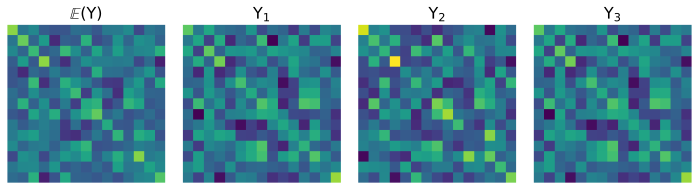

In [9]:
# Plot
rvdict = {"$\mathbb{E}(\mathsf{Y})$" : Y.mean().todense(), 
          "$\mathsf{Y}_1$" : Ysamples[2], "$\mathsf{Y}_2$" : Ysamples[1], "$\mathsf{Y}_3$" : Ysamples[2]}
vmin = np.min([np.min(mat) for mat in list(rvdict.values())])
vmax = np.max([np.max(mat) for mat in list(rvdict.values())])

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5), sharey=True)
for i, (title, rv) in enumerate(rvdict.items()):
    axes[i].imshow(rv, vmin=vmin, vmax=vmax)
    axes[i].set_axis_off()
    axes[i].title.set_text(title)
plt.tight_layout()